# ***Econ 143 - Advanced Econometrics Final Project***
**by Dayne Tran**



**Introduction and Initial Survey Data**

My final project is a fun, Berkeley-related showcase of contingent valuation of students' willingness-to-pay for a campus-wide ski lift. I remember back to three years ago, when reading about Berkeley upon my acceptance, I came across some students' proposal for something called BearLift. Here is the link to the comment under Carol Christ's Reddit Ask-Me-Anything from three years ago: https://www.reddit.com/r/berkeley/comments/9mhs3p/i_am_carol_christ_chancellor_of_uc_berkeley_ask/e7i1o4h/?context=3. 

When we began covering nonparametric analysis in class, I knew that I can put two and two together and apply this nonparametric technique to a very playful topic. So, I first developed a survey through Google Forms and collected 57 responses from fellow Berkeley students (https://forms.gle/jSU8tq5m7x37S58X6). The form has far greater detail about the pros and cons of a potential ski lift. I randomly assigned students to different initial prices ($100, $200, $300, $400, $500), then would direct them to the respective following price points (half or double) depending on their answer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
survey = pd.read_csv("Econ143_Ski_Slope_CV_Responses _Form_Responses.csv")
survey.tail()

,Email Address,Timestamp,"Per the nature of this experiment, these 5 symbols have been sorted into a random order. Please pick just the top answer.",Are you willing to pay $100 in annual student fees for BearLift?,You said no to $100 in annual student fees for Bear Lift. Are you willing to pay $50 in annual student fees for BearLift?,You said yes to $100 in annual student fees for Bear Lift. Are you willing to pay $200 in annual student fees for BearLift?,Are you willing to pay $200 in annual student fees for BearLift?,You said no to $200 in annual student fees for Bear Lift. Are you willing to pay $100 in annual student fees for BearLift?,You said yes to $200 in annual student fees for Bear Lift. Are you willing to pay $400 in annual student fees for BearLift?,Are you willing to pay $300 in annual student fees for BearLift?,You said no to $300 in annual student fees for Bear Lift. Are you willing to pay $150 in annual student fees for BearLift?,You said yes to $300 in annual student fees for Bear Lift. Are you willing to pay $600 in annual student fees for BearLift?,Are you willing to pay $400 in annual student fees for BearLift?,You said no to $400 in annual student fees for Bear Lift. Are you willing to pay $200 in annual student fees for BearLift?,You said yes to $400 in annual student fees for Bear Lift. Are you willing to pay $800 in annual student fees for BearLift?,Are you willing to pay $500 in annual student fees for BearLift?,You said no to $500 in annual student fees for Bear Lift. Are you willing to pay $250 in annual student fees for BearLift?,You said yes to $500 in annual student fees for Bear Lift. Are you willing to pay $1000 in annual student fees for BearLift?
53,rdison@berkeley.edu,5/12/2022 9:53,$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN
54,jholobetz@berkeley.edu,5/12/2022 10:18,!,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,gabrielcharoes@berkeley.edu,5/12/2022 11:16,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
56,michele.strazza.2000@gmail.com,5/12/2022 12:11,$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,NaN,NaN,NaN
57,1022charlotte@gmail.com,5/12/2022 13:17,$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN


**Survey DataFrame Cleaning**

Although we have collected our survey data with Google Forms, we still have a ways to go before we can derive students' willingness-to-pay for this ski slope. We still have to reformat this data in such a way that we can continue with our contingent valuation.

In [3]:
survey_drop_unnecessary_cols = survey.drop(survey.columns[:3], axis=1) # Drop emails, time-stamps, and randomizer
survey_fill_nan_and_replace_yes_no = survey_drop_unnecessary_cols.replace("Yes", 1).replace("No", 2).fillna(0) # Replace Yes with 1 and No with 2, fill na w/ 0
survey_cleaned = survey_fill_nan_and_replace_yes_no.iloc[1:].astype(int) # remove the 1st row (it errors) and set everything from float to int
survey_cleaned.head()

,Are you willing to pay $100 in annual student fees for BearLift?,You said no to $100 in annual student fees for Bear Lift. Are you willing to pay $50 in annual student fees for BearLift?,You said yes to $100 in annual student fees for Bear Lift. Are you willing to pay $200 in annual student fees for BearLift?,Are you willing to pay $200 in annual student fees for BearLift?,You said no to $200 in annual student fees for Bear Lift. Are you willing to pay $100 in annual student fees for BearLift?,You said yes to $200 in annual student fees for Bear Lift. Are you willing to pay $400 in annual student fees for BearLift?,Are you willing to pay $300 in annual student fees for BearLift?,You said no to $300 in annual student fees for Bear Lift. Are you willing to pay $150 in annual student fees for BearLift?,You said yes to $300 in annual student fees for Bear Lift. Are you willing to pay $600 in annual student fees for BearLift?,Are you willing to pay $400 in annual student fees for BearLift?,You said no to $400 in annual student fees for Bear Lift. Are you willing to pay $200 in annual student fees for BearLift?,You said yes to $400 in annual student fees for Bear Lift. Are you willing to pay $800 in annual student fees for BearLift?,Are you willing to pay $500 in annual student fees for BearLift?,You said no to $500 in annual student fees for Bear Lift. Are you willing to pay $250 in annual student fees for BearLift?,You said yes to $500 in annual student fees for Bear Lift. Are you willing to pay $1000 in annual student fees for BearLift?
1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0


In [4]:
def build_cv(respondent):
    '''
    Will take a respondent's answer to the survey and reformat their answer,
    by marking the answers and prices they chose for both parts of the survey
    '''
    cv = np.empty(4)
    for price_index_pair in [[100, 0],[200,3],[300,6], [400,9],[500,12]]: # identifies the 5 prices and their corresponding col index in surveys_cleaned.csv
        price = price_index_pair[0] # initial price
        index = price_index_pair[1] # col index for initial price
        if respondent[index] != 0: # signifies this is the initial price the respondent was given
            cv[0] = respondent[index] # 1st response: 1 (yes) or 2 (no)
            cv[1] = price
            if respondent[index] == 2: # if response is no, go to price-corresponding "no" col
                cv[2] = respondent[index + 1] # 2nd response: 1 (yes) or 2 (no)
                cv[3] = price / 2 # half price
            else:
                cv[2] = respondent[index + 2] # if response is yes, go to price-corresponding "yes" col
                cv[3] = price * 2 # double price
    return cv.astype(int) # set from float to int

In [5]:
cv_data = survey_cleaned.apply(build_cv, axis=1) # apply build_cv to every row/respondent in the survey
cv_data = np.array([np.array(xi) for xi in cv_data]) # reformat cv_data as a np.array
cv = pd.DataFrame(cv_data, columns=['Yes1DK','PT1','Yes2DK','PT2']) # turn into a DF
cv.head()

,Yes1DK,PT1,Yes2DK,PT2
0,1,300,2,600
1,1,500,1,1000
2,1,200,2,400
3,1,100,1,200
4,2,500,2,250


In [6]:
cv["LB"] = -9 
cv["UB"] = -9

# LOWER BOUND construction
# yes-yes responders
cv.loc[(cv["Yes1DK"]==1) & (cv["Yes2DK"]==1), "LB"] = cv["PT2"]

# yes-no responders
cv.loc[(cv["Yes1DK"]==1) & (cv["Yes2DK"]==2), "LB"] = cv["PT1"]

# no-yes responders
cv.loc[(cv["Yes1DK"]==2) & (cv["Yes2DK"]==1), "LB"] = cv["PT2"]

# no-no responders
cv.loc[(cv["Yes1DK"]==2) & (cv["Yes2DK"]==2), "LB"] = 0

# UPPER BOUND construction
# yes-yes responders
cv.loc[(cv["Yes1DK"]==1) & (cv["Yes2DK"]==1), "UB"] = np.inf

# yes-no responders
cv.loc[(cv["Yes1DK"]==1) & (cv["Yes2DK"]==2), "UB"] = cv["PT2"]

# no-yes responders
cv.loc[(cv["Yes1DK"]==2) & (cv["Yes2DK"]==1), "UB"] = cv["PT1"]

# no-no responders
cv.loc[(cv["Yes1DK"]==2) & (cv["Yes2DK"]==2), "UB"] = cv["PT2"]

Below are 10 of the lower and upper bounds for students' willingness-to-pay for the ski slope based on our double-bounded dichtomous choice process

In [7]:
cv[["LB","UB"]][0:10]

,LB,UB
0,300,600.0
1,1000,inf
2,200,400.0
3,200,inf
4,0,250.0
5,500,1000.0
6,0,200.0
7,200,inf
8,0,50.0
9,0,150.0


Now armed with the pairs of lower and upper bounds, we can build our matrix of dummy variables that indicate what prices respondents are willing to pay.

In [8]:
cv["D1"] = ((cv["LB"]<=0)   & (cv["UB"]>=50)     )*1
cv["D2"] = ((cv["LB"]<=50)  & (cv["UB"]>=100)    )*1
cv["D3"] = ((cv["LB"]<=100) & (cv["UB"]>=150)    )*1
cv["D4"] = ((cv["LB"]<=150) & (cv["UB"]>=200)    )*1
cv["D5"] = ((cv["LB"]<=200) & (cv["UB"]>=250)    )*1
cv["D6"] = ((cv["LB"]<=250) & (cv["UB"]>=300)    )*1
cv["D7"] = ((cv["LB"]<=300) & (cv["UB"]>=400)    )*1
cv["D8"] = ((cv["LB"]<=400) & (cv["UB"]>=500)    )*1
cv["D9"] = ((cv["LB"]<=500) & (cv["UB"]>=600)  )*1
cv["D10"] = ((cv["LB"]<=600) & (cv["UB"]>=800)  )*1
cv["D11"] = ((cv["LB"]<=800) & (cv["UB"]>=1000)  )*1
cv["D12"] = ((cv["LB"]<=1000) & (cv["UB"]>=np.inf) )*1
cv[["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12"]][0:10]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12
0,0,0,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,1,1,0,0,0,0,0
3,0,0,0,0,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,1,0
6,1,1,1,1,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,1,1,1,1,1,1
8,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,0,0


The entire objective of this process is to find some measure of central tendency regarding students' willingness-to-pay for the ski lift. We can achieve this by working our way towards a satisfactory cumulative distribution function and finding the interval at the 50th percentile.

In [9]:
def E_Step(F, D):
    
    """
    F : (F(b1),F(b2),...,F(bL)) willingness-to-pay CDF values, numpy (L-1,) array
    D : N x L matrix of indicators for WTP
    """
    
    L = len(F) + 1           # number of disjoint intervals 
           
    F_star = list(F)         # add 0 and 1 to list of CDF values
    F_star.insert(0,0)
    F_star.append(1)
    
    F_dif = []               # compute probability assigned to each of the l=1,..,L WTP intervals      
                             # given current value of F
    for l in range(L):
        F_dif.append(F_star[l+1] - F_star[l])     
    
    delta_0  = D * F_dif         # N x L matrix with numerator values for delta_il, i = 1,..,N, l = 1,...,L
    delta_1  = D @ F_dif         # N - vector with denominator values for delta_il, i = 1,..,N
        
    delta = delta_0.T / delta_1  # L x N matrix with posterior probability that each of the i = 1,..,N, 
                                 # units is in the l = 1,...,L bins given the data and current value of F
    return delta.T          

The next block of code uses Turnbull's method to compute "self-consistent" estimates of $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$.

In [10]:
D = cv[["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12"]]

# starting values for Turnbull algorithm
F_start = np.array([0.065, 0.19, 0.215, 0.276, 0.34, 0.41, 0.5, 0.59, 0.615, 0.84, 0.97])

finished  = False
converged = False
xtol      = 0.0001
maxiter   = 1000

iter = 0  # initialize iteration counter

while not converged:

    # Print optimization output to screen
    if (iter > 0): 
        print("Iteration = "       + "%.0f" % iter + \
              ",  2-norm of change in F = " + "%.6f" % epsilon)
    
    
    # ----------------------------------------------------------------------#
    # - E-Step: Compute posterior unit-specific WTP bin probabilities      -#
    # ----------------------------------------------------------------------#
    
    delta = E_Step(F_start, D)
    
    # ----------------------------------------------------------------------#
    # - M-Step: Update estimates of WTP distribution.                      -#
    # ----------------------------------------------------------------------#
    
    F_em = np.cumsum(np.mean(delta))[0:-1]
   
    # Assess convergence 
    epsilon = np.linalg.norm(F_start-F_em)
    
    if (epsilon < xtol) | (iter >= maxiter):
            finished = True
            if (epsilon < xtol):
                converged = True
        
    # Update parameters
    F_start = F_em
    iter += 1

Iteration = 1,  2-norm of change in F = 0.719990
Iteration = 2,  2-norm of change in F = 0.052285
Iteration = 3,  2-norm of change in F = 0.019912
Iteration = 4,  2-norm of change in F = 0.012506
Iteration = 5,  2-norm of change in F = 0.009025
Iteration = 6,  2-norm of change in F = 0.007418
Iteration = 7,  2-norm of change in F = 0.006689
Iteration = 8,  2-norm of change in F = 0.006321
Iteration = 9,  2-norm of change in F = 0.006074
Iteration = 10,  2-norm of change in F = 0.005855
Iteration = 11,  2-norm of change in F = 0.005635
Iteration = 12,  2-norm of change in F = 0.005406
Iteration = 13,  2-norm of change in F = 0.005172
Iteration = 14,  2-norm of change in F = 0.004936
Iteration = 15,  2-norm of change in F = 0.004702
Iteration = 16,  2-norm of change in F = 0.004472
Iteration = 17,  2-norm of change in F = 0.004249
Iteration = 18,  2-norm of change in F = 0.004035
Iteration = 19,  2-norm of change in F = 0.003829
Iteration = 20,  2-norm of change in F = 0.003633
Iteration

The code below outputs the CDF we are after: the 50th percentile for willingness-to-pay is somewhere between $100 and $150.

In [13]:
foo = list(F_em)
foo.insert(0,0)
data_em = {"Willingness-To-Pay" : [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000], "F(y), CDF" : foo}
data_em
WTP_em = pd.DataFrame.from_dict(data_em)
WTP_em['Survivorship of WTP'] = 1 - WTP_em['F(y), CDF'] 

WTP_em

,Willingness-To-Pay,"F(y), CDF",Survivorship of WTP
0,0,0.000000,1.000000
1,50,0.196802,0.803198
2,100,0.275522,0.724478
3,150,0.535366,0.464634
4,200,0.550813,0.449187
5,250,0.759008,0.240992
6,300,0.759649,0.240351
7,400,0.760972,0.239028
8,500,0.839917,0.160083
9,600,0.879562,0.120438


Below we plot the willingness-to-pay survivor function for the BearLift proposal.

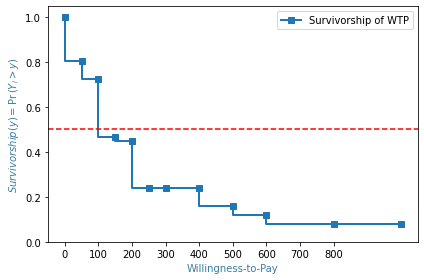

In [17]:
# Plot estimate WTP survivor function
fig_wtp_cdf, ax = plt.subplots()


WTP_em.plot(x="Willingness-To-Pay",y="Survivorship of WTP", drawstyle="steps", style='s-', linewidth=2, ax=ax)
color = '#3B7EA1' # Founder's Rock
ax.set_xlabel('Willingness-to-Pay', color=color)
ax.set_ylabel(r'$Survivorship(y)=\Pr\left(Y_{i}>y\right)$', color=color)
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
ax.set_xticks([0,100,200,300,400,500,600,700,800])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])

fig_wtp_cdf.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('fig_wtp_cdf', bbox_inches='tight', dpi=500) 

# **Conclusion**

We went out and gathered real data about an interesting topic that could have a real impact on the everyday lives of Berkeley students. We then conducted a nonparametric analysis of the data and found some measure of centeredness, by optimizing the posterior probabilities and cumulative distribution. We found that the 50th percentile of willingness-to-pay for BearLift lies in the ($100, $150) interval, and we can chart the survivorship function of the willingess-to-pay as we change the proposed price of the annual fee.
